# Bilaketa Lokala

Argi dago, batzuetan <i>Brute-Force</i> algoritmoa eraginkorra dela, baina beste batzuetan ez. Bilaketa lokala algoritmoa inplementatuko da orain. Algoritmo hau diseinatu eta inplementatzerakoan hainbat aukeraketa egin behar ditugu, esaterako, ingurunea edo aukeraketa irizpidea. Jarraian, atalez atal, bilaketa lokaleko algoritmoen elementu desberdinak inplementatuko ditugu.

Azken atalean, QAParen <i>tai20a</i> instantzia ebazten saiatuko gara (aurretik lortu ez dena).

### Ingurune bat implementatzen

Aipatu dugun bezela, QAParen <i>tai20a</i> instantzia ebaztea dugu helburu. Aurreko gaiko ariketetan ikusi dugun bezela, QAParen soluzioak kodetzeko errepresentazio egokiena permutazioak erabiltzea zela aipatu genuen. Atal honetan, $\sigma=(1,2,3,4,5,\ldots,20)$ permutazioa emanik, bere ingurunean dauden soluzio guztiak inprimatuko dituen kodea inplementatuko dugu. Klasean <i>swap</i> eta <i>insert</i> inguruneak ikusi ditugu, zein izango da egokiena inplementatzeko? Aukeratu bat eta implementatu.

In [14]:
size=20
solution=list(range(size))
num=0

## Ingurune-funtzioa
def swap_ingurune(solution):
    n = len(solution)
    for i in range(n):
        for j in range(i+1, n):
            a = solution.copy()
            a[i] = solution[j]
            a[j] = solution[i]
            yield a

# sawp erabili dut ingurunean dauden soluzioak lortzeko. 
# Modu desberdinetan egin daiteke. Nik kasu hoenetan listako elementu bakoitza gainontzekoekin banaka aldatzea egin dut.
# Lehen for-ak indize bat hartzen du eta bigarren for-arekin lista zeharaktzen da aldaketa egiteko indize horrekin.
# Bigarren for-an range(0, n) izango bazen, swap batzuk errepikatu egingo ziren. Horregatik range(i+1, n), behin lehen for-an 
# aztertu direnak ez dira berriro aldatuko

# Horretaz gain, generadore bat erabili dut soluzioak banaka emateko (lista batean denak gordetu beharrean). Honela, beheko
# algoritmoan funtzio hau for batean erabiliko da eta banaka soluzioak aztertko dira.

# Algoritmoaren konplexutasuna O(n^2)


### Inguruneko soluzioen aukeraketa

<i>Best first</i>, <i>Greedy</i> edo <i>Random</i> zein izango da irizpide egokiena? Bakoitzaren ahuleziak aipatu ditugu klasean. Erabaki bat hartzea zaila izaten da. Pista bat duzue: gehienez 1000 funtzio ebaluazio egin ahalko dituzue optimizazioan zehar. Erabili intuizioa eta inplementatu irizpideetako bat. Luzatu aurreko kodea, eta uneko soluzioa, bere ingurunetik aukeratu denarekin ordezkatu.

In [6]:
import numpy as np

# QAParen instantzia diskotik irakurtzeko funtzioa
def read_instance_QAP(filepath):
    fp=open(filepath)
    line=fp.readline()
    values=line.split()
    size=int(values[0])
    D=np.zeros((size,size))
    H=np.zeros((size,size))
    for i in range(size):
        line=fp.readline()
        values=line.split()
        for j in range(size):
            D[i][j]=int(values[j])
        
    for i in range(size,2*size):
        line=fp.readline()
        values=line.split()
        for j in range(size):
            H[i-size][j]=int(values[j])
    fp.close()
    return (size,D,H)

# Soluzio bat emanik, bere helburu-funtzioaren balioa kalkulatuko duen funtzioa.
def objective_function_QAP(solution, instance):
    size=instance[0]
    D=instance[1]
    H=instance[2]
    value=0
    for i in range(size):
        for j in range(size):
            value = value + (D[i][j]*H[solution[i]][solution[j]])

    return value

In [15]:
#Instantzia kargatu
instance=read_instance_QAP("tai20a.dat")
size=instance[0]

# Sortu lehenengo soluzioa eta kalkulatu bere fitness-a.
best_solution=list(range(size))
best_fitness=objective_function_QAP(best_solution,instance)
print("Initial solution: ",best_fitness, best_solution)

# Begiratu ingurunea eta ordezkatu soluzioa irizpide bat erabiliz.
evals=0
for a in swap_ingurune(best_solution):
    if evals >= 1000:
        break
    evals+=1
    
    fitness = objective_function_QAP(a,instance)
    if fitness < best_fitness:
        best_fitness = fitness
        best_solution = a
        #break # Best Fist break hazu jarriz izango zen

# Hasierako soluzioa edukita bere inguruneko soluzioak bakarrik aztertu.
# Nik egin dudana Greedy da. Jakinda n=20 dela eta ingurune guztiak sortzeko funtzioa-ren konplexutasuna O(n^2) dela,
# gehienez 400 iterazio beharko zituen. Maximoa 1000 denez, arazo gabe soluzio hoberena aurkituko du

# Greedy erabili da ingurunea behin bakarrik aztertzen delako. Baina, bilaketa lokaleko algoritmoan Best First aukeraketa 
# irizpidea izango da egokiena. 1000 iterazioko limitea izanik Greedy irizpidearekin soluzioetan gutxiago exploratuko da, 
# seguruenik amaieran soluzio okerragoa emanez.

print("Replaced solution: ",best_fitness, best_solution)

Initial solution:  878790.0 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Replaced solution:  842504.0 [0, 1, 2, 3, 4, 5, 13, 7, 8, 9, 10, 11, 12, 6, 14, 15, 16, 17, 18, 19]


### Bilaketa lokaleko algoritmoa

Dagoeneko bilaketa lokalaren oinarrizko pausua inplementatu dugu, soluzio baten ingurunetik, irizpideren bat erabiliz, soluzio bat aukeratzea. Orain, aurreko pausu hori, behin eta berriz aplikatuko dugu irizpideren bat erabiliz, algoritmoa gelditu arte.

Nola geldituko dugu algoritmoa baina? Erantzuna ondorengoa da: <u>gehienez 1000 funtzio ebaluazio egin ahal izango dituzue</u>.

Implementatu jarraian adierazten den <i>local_search</i> funtzioa aurretik erabili duzuen kodea berrerabiliz.

In [16]:
# Instantzia bat emanik bilaketa lokala inplementatzen duen funtzioa. Soluzioa eta bere fitness balioa itzuliko ditu
def local_search(instance, max_evals):

    size=instance[0]
    best_solution=list(range(size)) 
    best_fitness=objective_function_QAP(best_solution,instance)
    hobetu_da=1
    evals=1

    
    while hobetu_da:
        hobetu_da = 0 # ingurune berri bat aztertzen denez aldiro, hobetu den edo ez ikusteko 
        for a in swap_ingurune(best_solution): 
            if evals >= max_evals: # limitera iristean atera
                break
            evals += 1
            
            fitness = objective_function_QAP(a,instance)
            if fitness < best_fitness:
                best_fitness = fitness
                best_solution = a
                hobetu_da = 1
                break # Best First, inguruneko lehen soluzio hobea dena artu eta hurrengo ingurunera pasa 
                      # Greedy izateko break hau kentzea izango zen
    
    return (best_fitness, best_solution,evals)

# Algoritmo hau sortzeko ikusitako pseudokodea erabili da. Aukeraketa irizpidea, lehen aipatu dudan bezala, Best First izan da.

# Ebaluazio kantitatea 1000 baino gutxiago denez, optimo lokal batera iritsi da (algoritmoa amaituz). Greedy erabiliko bazen
# iterazio limitera iritsiko zen, optimo lokal batera iritsi gabe. Amaierako soluzio hori Best First-en lortutakoa baino
# okerragoa da, naiz eta iterazio gehiago egin. Arrazoioa explorazio gutxiago egin dela iterazio limite kopuru honetan.
# Bestalde, Best First-ek ingurune gehiago aztertu ditu (explorazio handiagoa) eta horregatik soluzio hobe batera iritsi da. 
 
    
import time as tm

#Instantzia kargatu
instance=read_instance_QAP("tai20a.dat")

# Algoritmoa exekutatu eta kalkulatu konputorako denborak
start=tm.time()
(fitness,sol,evals)=local_search(instance,1000)
end=tm.time()

# Inprimatu balioak pantailan.
print("Best fitness solution ",fitness, sol)
print("Execution time: ",end-start)
print("Evaluations consumed: ",evals)

Best fitness solution  748156.0 [8, 7, 6, 3, 19, 9, 13, 4, 1, 0, 10, 16, 2, 14, 11, 15, 5, 17, 18, 12]
Execution time:  0.1493217945098877
Evaluations consumed:  763


Zein izan da lortu duzuen emaitza onena 1000 ebaluaziorekin? Erakutsi irakasleari kodea balidatzeko, eta txapelketarako ranking-a osatzeko.

### Zer gertazen da ebaluazio kopuru desberdinekin probatuz gero?

Jarraian emaitza onena nola aldatzen den ikusiko dugu ebaluazio kopuru desberdinetarako. Ez hori bakarrik, <i>Random Search</i>-arekin konparatuko ditugu emaitzak. Ea nor den onena.

In [29]:
import random
import more_itertools as mit
# Instantzia bat eta soluzio kopuru bat emanik ausazko bilaketa inplementatzen duen funtzioa. 
# Soluzioa eta bere fitness balioa itzuliko ditu
def random_search(instance, num_solutions):

    n = instance[0] 
    best_solution = list(range(n))
    best_fitness = objective_function_QAP(best_solution,instance)
    for _ in range(num_solutions):
        solution = mit.random_permutation(range(n)) # soluzio posible bat hartzen du ausaz
        value = objective_function_QAP(solution, instance) # soluzio horren fitness kalkulatu
        if value < best_fitness: # soluzio posible honen fitness-a hobea bada, aktualizatu 
            best_fitness = value
            best_solution = solution
    
    return (best_fitness, best_solution)

        n  Local Search  Random Search
0      10      942783.6       949267.8
1     100      903478.4       914414.8
2    1000      822971.6       901508.6
3   10000      822971.6       887516.6
4  100000      822971.6       875659.2


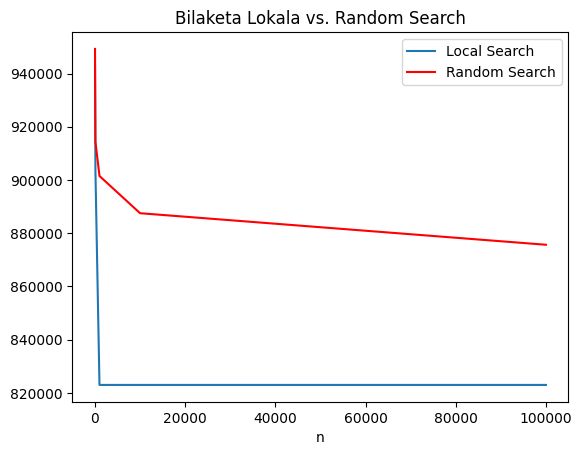

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

list_budget = []
list_best_ls = []
list_best_rs = []
repetitions=10

#Instantzia kargatu
instance=read_instance_QAP("tai20a.dat")

# Egin exekuzioak budget desberdinetarako: 10, 100, 1000, 10000...
for exp in range(1,6):

    budget=10**exp 
    list_budget.append(budget)
    
    # Local Search
    avg_fit=0
    for rep in range(repetitions+1):
        (fitness,sol,_)=local_search(instance,budget)
        avg_fit+=fitness
    avg_fit=avg_fit/repetitions
    list_best_ls.append(avg_fit)
    
    # Random Search
    
    avg_fit=0
    for rep in range(repetitions+1):
        (fitness,sol)=random_search(instance,budget)
        avg_fit+=fitness
    avg_fit=avg_fit/repetitions
    list_best_rs.append(avg_fit)
    
    

# Datuak gordetzeko egitura
datuak = pd.DataFrame({"n":list_budget,"Local Search":list_best_ls,"Random Search":list_best_rs}) 
print(datuak)

#Irudikatu emaitzak plot batean.
ax = plt.gca()
datuak.plot(kind='line',x='n',y='Local Search',ax=ax)
datuak.plot(kind='line',x='n',y='Random Search', color='red', ax=ax,title='Bilaketa Lokala vs. Random Search')
plt.show()

#### Zein ondorio ateratzen dituzu irudia ikusi ondoren?

In [ ]:
## Erantzun hemen.
'''
Bilaketa lokalean n > 100 denean, optimo lokal berdinera iristen da aldiro (erabili den hasierako soluzio konkretu honetan), 
media berdina emanez. Orduan, optimo lokal berdinan geratzen denez ez da iterazio kopuru handiagoaz baliatzen.

Bestalde, Random Search-en n haundituz ahala, media hobea ematen du (zentzuzkoa da, aukera gehiago aztertzen ditu eta).
Hala ere, lortzen den media bilaketa lokalekoa baina dezentez okerragoa da.

Honekin ondorieztatzen da bilaketa lokala ausazkoa baino eraginkorragoa dela kasu gehienetan, naiz eta bilaketa lokalan ia beti
optimo lokaletan geratu (hau sahiestu daiteke, baina ez da laborategi honen helburua)
'''

#### Ariketa honetan, ingurune funtzio konkretu bat erabili duzu, zergaitik uste duzu beste aukera baino hobea dela (adi, erantzuna ez da tribiala!)

In [ ]:
## Erantzun hemen.
'''
Insert erabilita soluzio baten auzokide kopurua handitu egiten da. Gainera, auzokide hauek sortzeko aldaketa nahiko handia
egiten da eta diferentzia nabarmena dago jatorrizkoarekin alderatuta. Bestalde, swap-en aldaketak txikiagoak dira eta auzokideek 
antza gehiago dute jatorrizkoarekin. 

Gainera, soluzio gehiago aztertu beharko ziren insert erabilita (auzokide gehiago), eta jakinda iterazio kopurua dagoela,
limitera lehenago iritsiko da soluzioetan asko exploratu gabe. 

'''
